<a href="https://colab.research.google.com/github/victoriafabris/disciplina-dsp-audio-video/blob/main/atividade8/atividade_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Filtros em Imagens

In [84]:
pip install imshowpair &> /dev/null

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import imshowpair as isp
from scipy import signal
from skimage import data, io, filters,feature, morphology, color, util, draw, img_as_ubyte
from skimage.filters import rank, unsharp_mask, sobel
from skimage.color import rgb2gray
from skimage.transform import hough_circle, hough_circle_peaks, hough_ellipse

In [86]:
import warnings
warnings.filterwarnings('ignore')

##Filtros passa-baixas

1. Vimos que para filtrar uma imagem, é necessário definir um kernel, que nada mais é que a resposta ao impulso do filtro. Considere a imagem [1]. Defina filtros passa-baixas (a) 3x3 e (b) 9x9. Você pode gerar manualmente a matriz (como no exemplo Blur de [2]) ou usar um dos elementos estruturantes (square, disk, etc.) do módulo morphology do Skimage [3]. Filtre a imagem. A imagem é melhorada com esses filtros?

In [87]:
#lendo a imagem
noise = io.imread('Noise_salt_and_pepper.png')

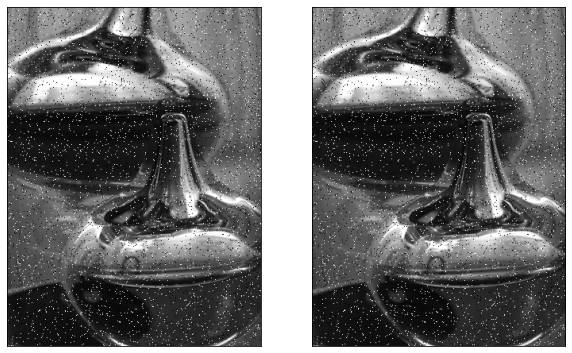

In [88]:
#filtro passa-baixas (a) 3x3
noise_pb3 = morphology.square(3)*1/(3**2) #usando o elemento estruturante square
noise3 = signal.convolve2d(noise,noise_pb3) #convolucao dos dois vetores
plt.figure(figsize=(10,14))
isp.imshowpair(noise,noise,cmap='gray')

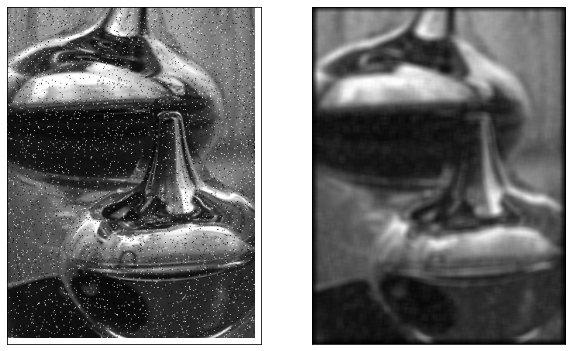

In [89]:
#filtro passa-baixas (b) 9x9
noise_pb9 = morphology.square(9)*1/(9**2) #usando o elemento estruturante square
noise9 = signal.convolve2d(noise,noise_pb9) #convolucao dos dois vetores
plt.figure(figsize=(10,14))
isp.imshowpair(noise,noise9,cmap='gray')

Com os filtros e kernel escolhidos, a imagem é modificada. Para o filtro com kernel 3x3, nota-se pouca mudança em relação ao ruído na imagem original. Já no filtro com kernel 9x9 notamos a retirada quase total do ruído, porém a imagem fica muito "borrada". Com isto, não podemos dizer que os filtros melhoram realmente a imagem.

2. Filtre novamente a mesma imagem [1], mas usando um filtro de média bilateral [4]. Explique suas vantagens.


In [90]:
noise_mean = rank.mean(noise,morphology.disk(10))

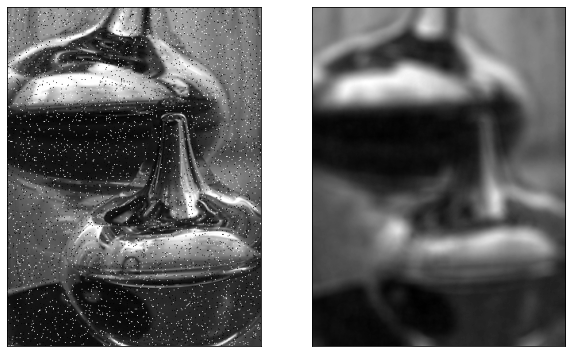

In [91]:
#imagem sem filtro
plt.figure(figsize=(10,14))
isp.imshowpair(noise,noise_mean,cmap='gray')

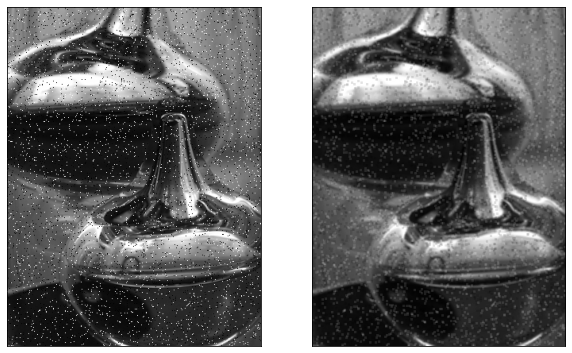

In [92]:
noise_mean3 = rank.mean(noise,noise_pb3)
plt.figure(figsize=(10,14))
isp.imshowpair(noise,noise_mean3,cmap='gray')

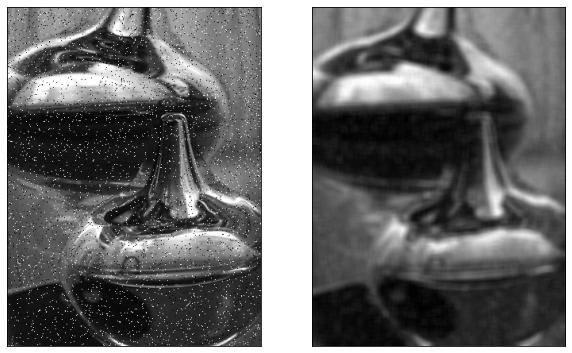

In [93]:
#filtro passa-baixas 9x9
noise_mean9 = rank.mean(noise,noise_pb9)
plt.figure(figsize=(10,14))
isp.imshowpair(noise,noise_mean9,cmap='gray')

No uso do filtro de média bilaterl notamos que há uma leve removida nos ruídos, porémé perdida a nitidez da imagem.

3. Filtre a mesma imagem [1] com filtro de mediana [5]. A imagem é melhorada? Qual a influência do tamanho do filtro e do formato do elemento estruturante? O filtro de mediana é linear?



In [94]:
noise_median = rank.median(noise,morphology.disk(2))

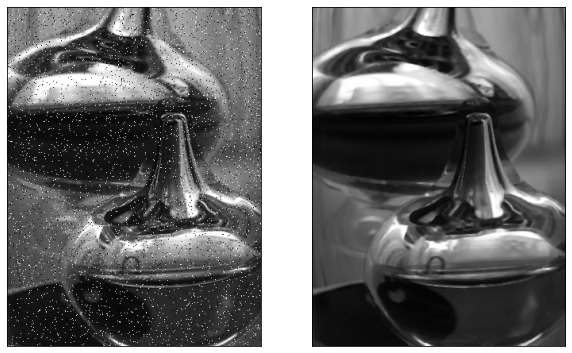

In [95]:
#imagem sem filtro
plt.figure(figsize=(10,14))
isp.imshowpair(noise,noise_median,cmap='gray')

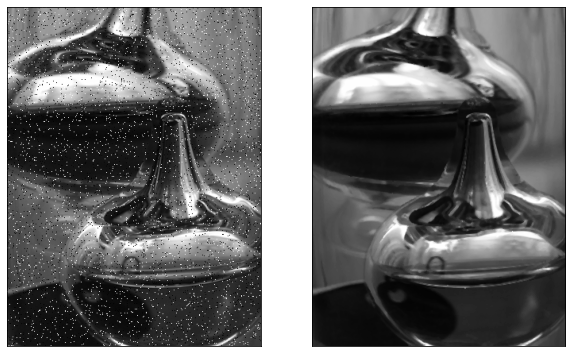

In [96]:
#filtro passa-baixas 3x3
noise_median3 = rank.median(noise,noise_pb3)
plt.figure(figsize=(10,14))
isp.imshowpair(noise,noise_median3,cmap='gray')

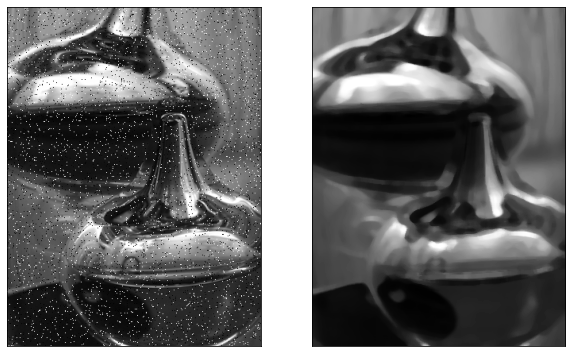

In [97]:
#filtro passa-baixas 9x9
noise_median9 = rank.median(noise,noise_pb9)
plt.figure(figsize=(10,14))
isp.imshowpair(noise,noise_median9,cmap='gray')

  Dos filtros anteriores, o filtro de mediana é o que mais melhora a imagem. Notamos uma melhora significativa tanto na retirada do ruído quanto na nitidez da imagem filtada, em relação ao uso dos filtros anteriores.
  Podemos notar que quanto maior o kernel, mais desfocada a imagem filtrada fica.
  É necessário então primeiro uma análise da imagem para identificar o melhor filtro para cada.

##Filtros passa-altas

1.Considere a imagem [6]. Procure melhorá-la (aguçar os contornos) usando um filtro linear. Você pode usar um filtro passa-altas (como no exemplo Sharpening de [2]) ou a máscara unsharp_mask de skimage.filters [7].

In [98]:
#lendo a imagem
moon= io.imread('moon.tif')

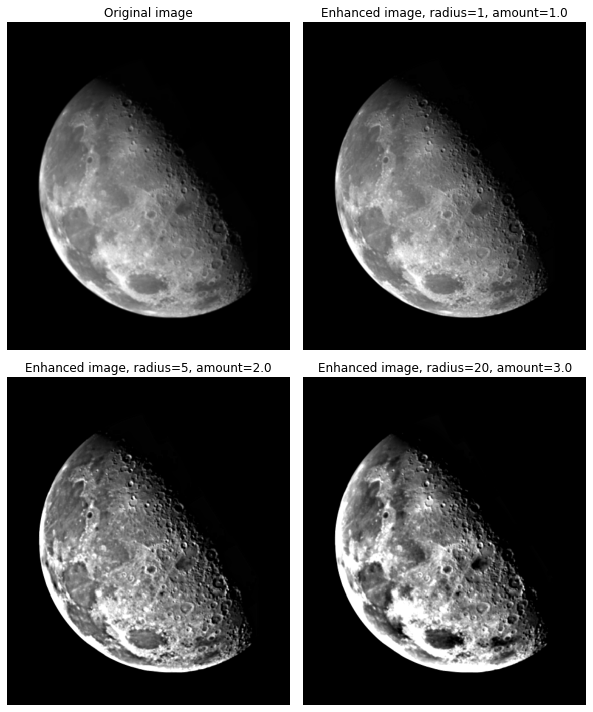

In [99]:
#utilizando unsharp_mask do pacote skimage.filters
#unsharp_mask (mascaramento) é uma técnica de processamento de imagem linear que torna a imagem mais nítida.
result_1 = unsharp_mask(moon, radius=1, amount=1)
result_2 = unsharp_mask(moon, radius=5, amount=2)
result_3 = unsharp_mask(moon, radius=20, amount=2)
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(moon, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=3.0')
for a in ax:
  a.axis('off')  
  fig.tight_layout()
plt.show()

##Detecção de bordas

1. Usando um kernel do tipo Sobel ou Canny, identifique as bordas da folha na imagem [8]. Mostre o resultado. Depois, aplique os mesmos parâmetros para a imagem [9]. As bordas são detectadas corretamente? É necessário ajustar os parâmetros?

In [100]:
#lendo as imagens
A = io.imread('A.tif')
coins_nonuniform_lighting = io.imread('coins_nonuniform_lighting.bmp')

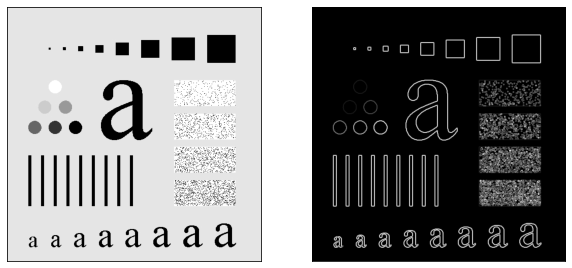

In [101]:
#aplicando o kernel do tipo sobel
A_sobel = sobel(A)
plt.figure(figsize=(10,14))
isp.imshowpair(A,A_sobel,cmap='gray')

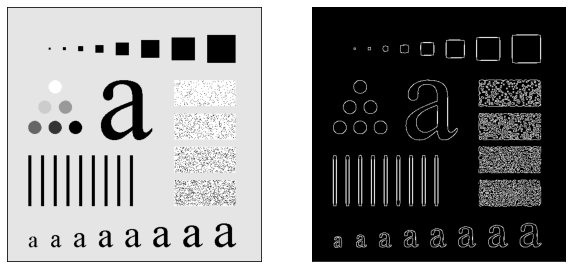

In [102]:
#aplicando o kernel do tipo canny
A_canny = feature.canny(A)
plt.figure(figsize=(10,14))
isp.imshowpair(A,A_canny,cmap='gray')

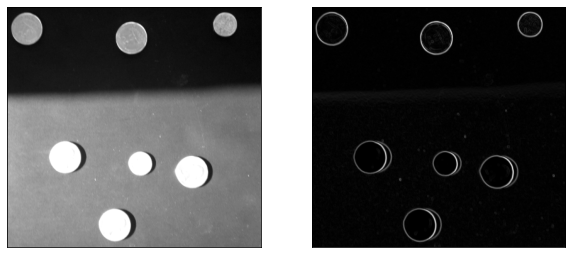

In [103]:
#aplicando o kernel do tipo sobel
coins_nonuniform_lighting_sobel = sobel(coins_nonuniform_lighting)
plt.figure(figsize=(10,14))
isp.imshowpair(coins_nonuniform_lighting,coins_nonuniform_lighting_sobel,cmap='gray')

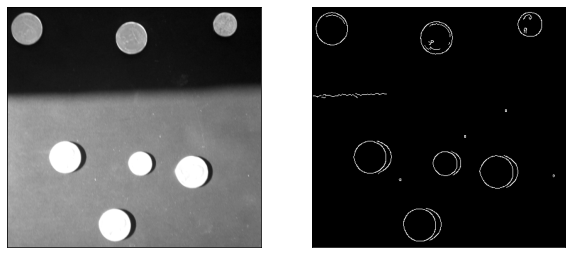

In [104]:
#aplicando o kernel do tipo canny
coins_nonuniform_lighting_canny = feature.canny(coins_nonuniform_lighting)
plt.figure(figsize=(10,14))
isp.imshowpair(coins_nonuniform_lighting,coins_nonuniform_lighting_canny,cmap='gray')


##Transformada circular de Hough

1. Estude os exemplos de uso da transformada circular de Hough para detecção de círculos em imagens [10],[11]. Depois, identifique o número de moedas na imagem Brazilian_coins [12]. Devido à iluminação, talvez não seja possível identificar corretamente todas.

In [105]:
# Load picture and detect edges
Brazilian_coins = util.img_as_ubyte(Brazilian_coins_dim_modif)
edges = feature.canny(Brazilian_coins, sigma=3, low_threshold=10, high_threshold=50)

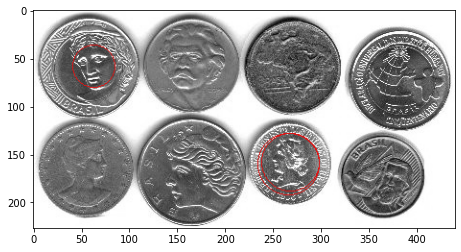

In [106]:
# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
Brazilian_coins = color.gray2rgb(Brazilian_coins)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = draw.circle_perimeter(center_y, center_x, radius, shape=Brazilian_coins.shape)
    Brazilian_coins[circy, circx] = (220, 20, 20)

ax.imshow(Brazilian_coins, cmap=plt.cm.gray)
plt.show()

#Referências


[1] hw3_train.jpg de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip

[2] https://www.codingame.com/playgrounds/2524/basic-image-manipulation/filtering

[3] https://scikit-image.org/docs/dev/api/skimage.morphology.html

[4] https://scikit-image.org/docs/dev/auto_examples/applications/plot_rank_filters.html#image-smoothing

[5] https://scikit-image.org/docs/dev/auto_examples/applications/plot_rank_filters.html#noise-removal

[6] hw3_road_sign_school_blurry.jpg de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip

[7] https://scikit-image.org/docs/dev/auto_examples/filters/plot_unsharp_mask.html

[8] hw3_leaf_training_1.jpg de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip

[9] hw3_leaf_training_4.jpg de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip

[10] https://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html

[11] https://www.codingame.com/playgrounds/38470/how-to-detect-circles-in-images

[12] http://worldcoingallery.com/countries/bg/Brazil.jpg


#Bibliografia


https://scikit-image.org/docs/dev/auto_examples/applications/plot_rank_filters.html#image-smoothing

https://www.mathworks.com/help/images/what-is-image-filtering-in-the-spatial-domain.html

https://www.mathworks.com/examples/image/mw/images-ex48835658-detect-edges-in-images

https://www.mathworks.com/examples/image/mw/images-ex80028725-trace-boundaries-of-objects-in-images

https://www.mathworks.com/help/images/ref/imfindcircles.html#examples

https://www.mathworks.com/examples/image/community/18507-missing-planes